#CREDIT CARD FRAUD DETECTION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to upload the kaggle.json file:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akashilay","key":"4b492ff0abe2f5cacdffcb47c8bf1def"}'}

In [3]:
# Download the dataset
# Use the Kaggle API to download the dataset.
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 92% 185M/202M [00:01<00:00, 203MB/s]
100% 202M/202M [00:01<00:00, 185MB/s]


In [4]:
# Unzip the downloaded dataset.
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [5]:
# Load the datasets
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

##DATA PREPROCESSING

In [7]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

In [8]:
print("\nTest Data Info:")
print(test_data.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long               

In [9]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [10]:
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [11]:
# Check for missing values in both datasets
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [12]:
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Test Data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [13]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [14]:
# Display summary statistics of the train dataset
print("\nTrain Data Summary Statistics:")
print(train_data.describe())


Train Data Summary Statistics:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01

##Analysis

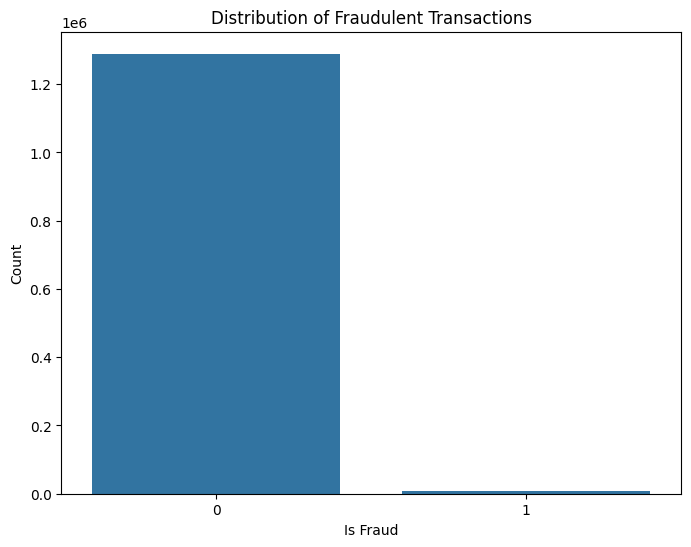

In [16]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

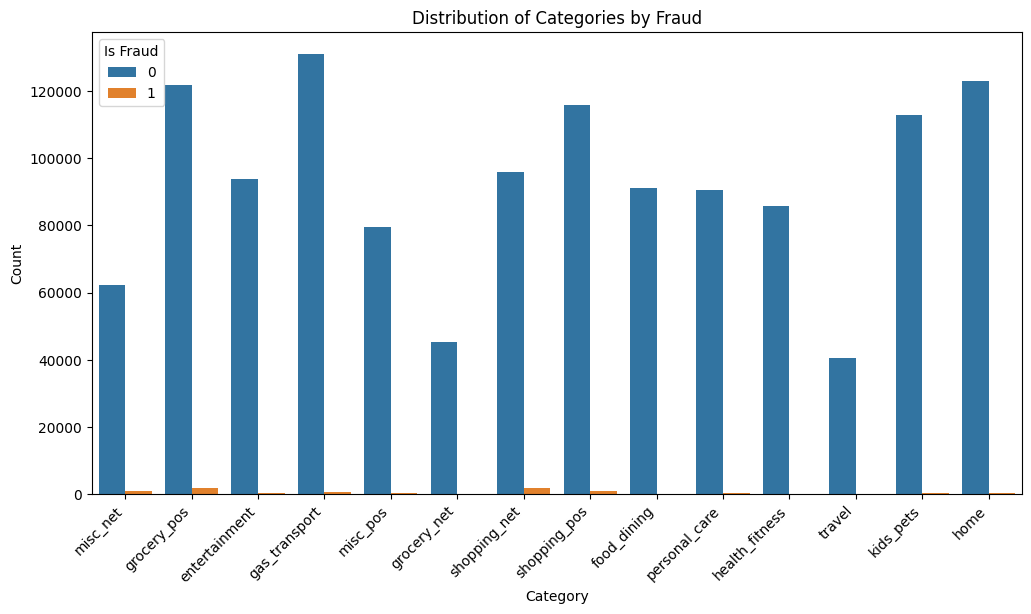

In [21]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

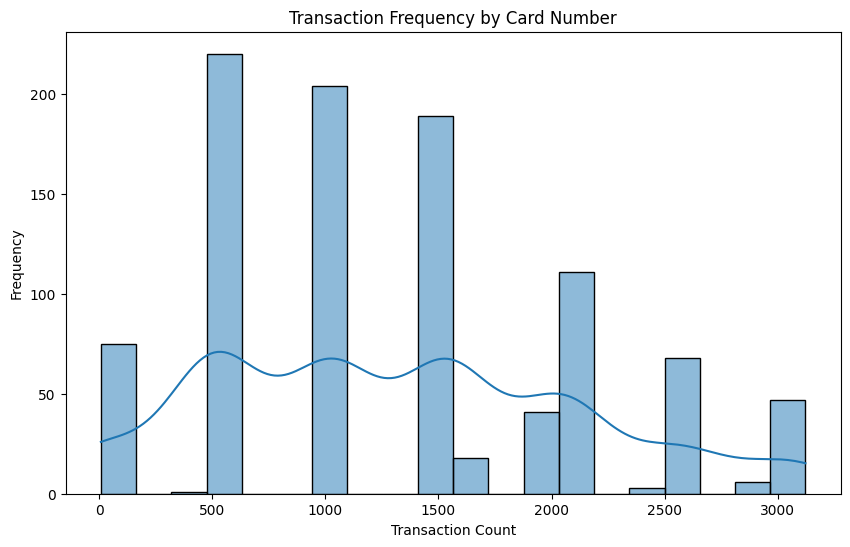

In [19]:
# Transaction Frequency by Card Number
card_transaction_counts = train_data['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

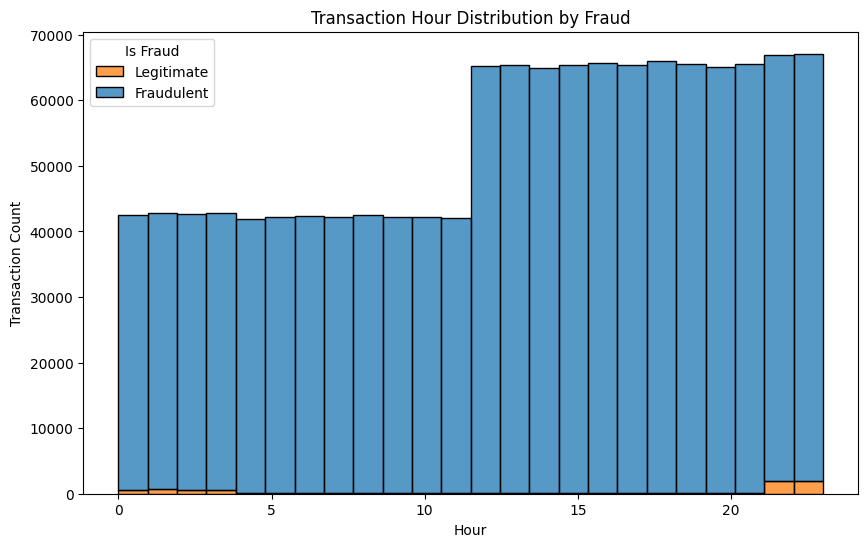

In [18]:
# Transaction Time and Fraud Correlation
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

##MODEL BUILDING

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [23]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()


In [24]:
# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])

In [25]:
# Concatenate encoded and scaled features for both train and test data
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

In [26]:
# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']

In [27]:
# Generating synthetic data to balance the imbalanced dataset
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [28]:
# checking newly created data
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  2578338


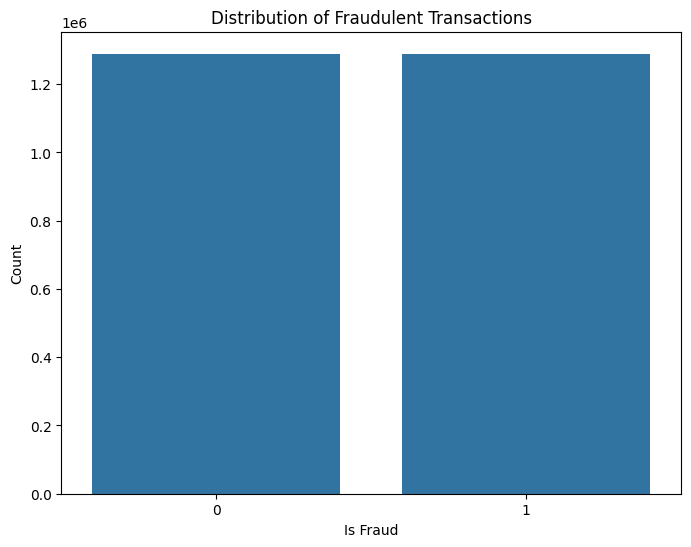

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resample)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [30]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [31]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [32]:
# for the initial selection process we will use a tiny
# portion of the actual training dataset
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [33]:
# Train Logistic Regression model
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Make predictions on test data
lg_predictions = lg_model.predict(x_validation)

# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_validation, lg_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 82.488%
